# Load Library

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import warnings

warnings.filterwarnings('ignore')

In [3]:
from tqdm import tqdm
import os
import data_utils
import model_utils
from attack_utils import get_CSMIA_case_by_case_results, CSMIA_attack, LOMIA_attack, get_LOMIA_results
from data_utils import oneHotCatVars, filter_random_data_by_conf_score
from vulnerability_score_utils import get_vulnerability_score, draw_hist_plot
from experiment_utils import MIAExperiment
from disparity_inference_utils import get_confidence_array, draw_confidence_array_scatter, get_indices_by_group_condition, get_corr_btn_sens_and_out_per_subgroup, get_slopes, get_angular_difference, calculate_stds, get_mutual_info_btn_sens_and_out_per_subgroup
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.neural_network._base import ACTIVATIONS
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics import roc_curve, auc, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import seaborn as sns
import tabulate
import pickle
# import utils
import copy
from scipy.stats import kendalltau, spearmanr

import matplotlib as mpl

# Setting the font family, size, and weight globally
mpl.rcParams['font.family'] = 'DejaVu Sans'
mpl.rcParams['font.size'] = 8
mpl.rcParams['font.weight'] = 'light'

In [4]:
experiment = MIAExperiment(sampling_condition_dict_list = 
    {
            'subgroup_col_name': 'ST',
    }, shortname = f"Corr_btn_sens_and_output_for_ST_ranging_from_0_to_-0.5"
)

  2%|▏         | 1/51 [00:01<00:56,  1.14s/it]

before scaling: 505 392 1.288265306122449
after scaling: 392 392 1.0
before scaling: 496 125 3.968
after scaling: 125 125 1.0


  6%|▌         | 3/51 [00:03<00:52,  1.10s/it]

before scaling: 486 253 1.9209486166007905
after scaling: 253 253 1.0


 14%|█▎        | 7/51 [00:07<00:48,  1.09s/it]

before scaling: 466 219 2.127853881278539
after scaling: 219 219 1.0


 22%|██▏       | 11/51 [00:11<00:43,  1.08s/it]

before scaling: 447 336 1.3303571428571428
after scaling: 336 336 1.0


 24%|██▎       | 12/51 [00:13<00:41,  1.07s/it]

before scaling: 442 164 2.6951219512195124
after scaling: 164 164 1.0


 31%|███▏      | 16/51 [00:17<00:37,  1.06s/it]

before scaling: 427 314 1.3598726114649682
after scaling: 314 314 1.0


 33%|███▎      | 17/51 [00:18<00:35,  1.06s/it]

before scaling: 422 300 1.4066666666666667
after scaling: 300 300 1.0


 37%|███▋      | 19/51 [00:20<00:33,  1.05s/it]

before scaling: 594 566 1.0494699646643109
after scaling: 566 566 1.0
before scaling: 407 163 2.496932515337423
after scaling: 163 163 1.0


 47%|████▋     | 24/51 [00:26<00:30,  1.11s/it]

before scaling: 383 274 1.397810218978102
after scaling: 274 274 1.0


 51%|█████     | 26/51 [00:28<00:27,  1.09s/it]

before scaling: 628 469 1.3390191897654584
after scaling: 469 469 1.0
before scaling: 373 126 2.9603174603174605
after scaling: 126 126 1.0


 55%|█████▍    | 28/51 [00:30<00:24,  1.06s/it]

before scaling: 368 187 1.967914438502674
after scaling: 187 187 1.0


 57%|█████▋    | 29/51 [00:31<00:23,  1.05s/it]

before scaling: 358 294 1.217687074829932
after scaling: 294 294 1.0


 63%|██████▎   | 32/51 [00:34<00:19,  1.05s/it]

before scaling: 349 316 1.1044303797468353
after scaling: 316 316 1.0


 67%|██████▋   | 34/51 [00:36<00:18,  1.07s/it]

before scaling: 667 493 1.3529411764705883
after scaling: 492 493 0.9979716024340771


 69%|██████▊   | 35/51 [00:37<00:17,  1.07s/it]

before scaling: 334 120 2.783333333333333
after scaling: 120 120 1.0


 78%|███████▊  | 40/51 [00:42<00:11,  1.05s/it]

before scaling: 309 260 1.1884615384615385
after scaling: 260 260 1.0


 80%|████████  | 41/51 [00:43<00:10,  1.05s/it]

before scaling: 701 357 1.9635854341736694
after scaling: 357 357 1.0


 82%|████████▏ | 42/51 [00:45<00:09,  1.07s/it]

before scaling: 300 76 3.9473684210526314
after scaling: 76 76 1.0


 88%|████████▊ | 45/51 [00:48<00:06,  1.06s/it]

before scaling: 721 325 2.2184615384615385
after scaling: 325 325 1.0


 90%|█████████ | 46/51 [00:49<00:05,  1.06s/it]

before scaling: 280 101 2.772277227722772
after scaling: 101 101 1.0


 94%|█████████▍| 48/51 [00:51<00:03,  1.05s/it]

before scaling: 736 697 1.0559540889526542
after scaling: 697 697 1.0


 96%|█████████▌| 49/51 [00:52<00:02,  1.05s/it]

before scaling: 265 171 1.5497076023391814
after scaling: 171 171 1.0


 98%|█████████▊| 50/51 [00:53<00:01,  1.06s/it]

before scaling: 746 326 2.2883435582822087
after scaling: 326 326 1.0
before scaling: 255 87 2.9310344827586206
after scaling: 87 87 1.0


100%|██████████| 51/51 [00:54<00:00,  1.07s/it]


[1000, 1000, 776, 252, 1000, 1000, 1000, 520, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 469, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 751, 1000, 371, 1000, 1000, 1000, 1000, 1000, 735, 1000, 710, 1000, 1000, 1000, 1000, 952, 400, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 715, 1000, 1000, 746, 337, 1000, 508, 1000, 1000, 1000, 821, 1000, 1000, 1000, 905, 1000, 1000, 1000, 1000, 738, 359, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 841, 1000, 1000, 509, 253, 1000, 1000, 1000, 1000, 1000, 1000, 450, 360, 1000, 1000, 1000, 1000, 947, 645, 1000, 1000, 436, 341]


In [5]:
save_model = True

print(f"Training classifier for experiment: {experiment}")
try:
    experiment.clf = model_utils.load_model(f'<PATH_TO_MODEL>/{experiment.ds.ds.filenameroot}_target_model.pkl')
    print(f"Loaded classifier for experiment from file: {experiment}")
except:
    # clf = model_utils.get_model(max_iter=500, hidden_layer_sizes=(256, 256))
    experiment.clf = model_utils.get_model(max_iter=500)
    experiment.clf.fit(experiment.X_train, experiment.y_tr_onehot)

    if save_model:
        model_utils.save_model(experiment.clf, f'<PATH_TO_MODEL>/{experiment.ds.ds.filenameroot}_target_model.pkl')

Training classifier for experiment: Census19_subgroup_col_name_ST
Loaded classifier for experiment from file: Census19_subgroup_col_name_ST


In [11]:
experiment.confidence_array = get_confidence_array(experiment, experiment.X_train, experiment.y_tr, experiment.clf)
sens_pred, case_indices = CSMIA_attack(experiment.clf, experiment.X_train, experiment.y_tr, experiment.ds.ds.meta)
case_2_indices = case_indices[2]
experiment.confidence_array_case_2 = experiment.confidence_array[case_2_indices, :]
experiment.X_case_2 = experiment.X_train.loc[case_2_indices].copy().reset_index(drop=True)
experiment.y_case_2 = experiment.y_tr.ravel()[case_2_indices]
experiment.sens_val_ground_truth = experiment.X_train[[f'{experiment.sensitive_column}_1']].to_numpy().ravel()
experiment.sens_pred_CSMIA = sens_pred
experiment.sens_pred_LOMIA = LOMIA_attack(experiment, experiment.clf, experiment.X_train, experiment.y_tr, experiment.ds.ds.meta)

# Estimation of Correlation

In [7]:

correlation_vs_ang_diff = {}
sensitive_column_index = list(experiment.X_train.columns).index(f'{experiment.sensitive_column}_1')
conditions =  [{'ST': i} for i in range(50)]
for i, condition in enumerate(conditions):
    fcondition = f'{condition}'
    indices = get_indices_by_group_condition(experiment.X_case_2, condition)
    angular_difference = get_angular_difference(experiment, experiment.confidence_array_case_2[indices], experiment.y_case_2[indices])
    correlation_vs_ang_diff[fcondition] = {}
    correlation_vs_ang_diff[fcondition]['angular_difference'] = angular_difference
    correlation_vs_ang_diff[fcondition]['subgroup_val'] = condition['ST']

correlation_vs_ang_diff_df = pd.DataFrame.from_dict(correlation_vs_ang_diff, orient='index')

state_vals_sorted = correlation_vs_ang_diff_df.sort_values(by='angular_difference', ascending=False)[['subgroup_val']].to_numpy().ravel().tolist()
conditions =  [{'ST': state_vals_sorted[:j]} for j in range(12, 37)] + [{'ST': state_vals_sorted[j:]} for j in range(12, 37)] + [{'ST': i} for i in range(50)]
temp_df = experiment.X_train.copy()
temp_df[f'{experiment.sensitive_column}_1'] = experiment.sens_pred_CSMIA
sample_indices = experiment.X_train.sample(n=500, random_state=1).index
for i, condition in enumerate(conditions):
    fcondition = f'{condition}'
    correlation_p = get_corr_btn_sens_and_out_per_subgroup(experiment, experiment.X_train.loc[sample_indices].copy().reset_index(drop=True), experiment.y_tr[sample_indices], condition)
    correlation = get_corr_btn_sens_and_out_per_subgroup(experiment, experiment.X_train, experiment.y_tr, condition)
    
    correlation_prediction = get_corr_btn_sens_and_out_per_subgroup(experiment, temp_df, experiment.y_tr, condition)
    indices = get_indices_by_group_condition(experiment.X_case_2, condition)
    angular_difference = get_angular_difference(experiment, experiment.confidence_array_case_2[indices], experiment.y_case_2[indices])
    correlation_vs_ang_diff[fcondition] = {}
    correlation_vs_ang_diff[fcondition]['correlation'] = correlation
    correlation_vs_ang_diff[fcondition]['correlation_p'] = correlation_p
    correlation_vs_ang_diff[fcondition]['correlation_prediction'] = correlation_prediction
    # correlation_vs_ang_diff[fcondition]['mutual_info'] = mutual_info
    correlation_vs_ang_diff[fcondition]['angular_difference'] = angular_difference

correlation_vs_ang_diff_df = pd.DataFrame.from_dict(correlation_vs_ang_diff, orient='index')
correlation_vs_ang_diff_df = correlation_vs_ang_diff_df.fillna(0)
# return correlation_vs_ang_diff_df

In [8]:
def calculate_ang_diff(n=1000, random_state=1):
    correlation_vs_ang_diff = {}
    sensitive_column_index = list(experiment.X_train.columns).index(f'{experiment.sensitive_column}_1')
    conditions =  [{'ST': i} for i in range(50)]
    for i, condition in enumerate(conditions):
        fcondition = f'{condition}'
        indices = get_indices_by_group_condition(experiment.X_case_2, condition)
        angular_difference = get_angular_difference(experiment, experiment.confidence_array_case_2[indices], experiment.y_case_2[indices])
        correlation_vs_ang_diff[fcondition] = {}
        correlation_vs_ang_diff[fcondition]['angular_difference'] = angular_difference
        correlation_vs_ang_diff[fcondition]['subgroup_val'] = condition['ST']

    correlation_vs_ang_diff_df = pd.DataFrame.from_dict(correlation_vs_ang_diff, orient='index')

    state_vals_sorted = correlation_vs_ang_diff_df.sort_values(by='angular_difference', ascending=False)[['subgroup_val']].to_numpy().ravel().tolist()
    conditions =  [{'ST': state_vals_sorted[:j]} for j in range(12, 37)] + [{'ST': state_vals_sorted[j:]} for j in range(12, 37)] + [{'ST': i} for i in range(50)]
    temp_df = experiment.X_train.copy()
    temp_df[f'{experiment.sensitive_column}_1'] = experiment.sens_pred_CSMIA
    sample_indices = experiment.X_train.sample(n=n, random_state=random_state).index

    correlation_vs_ang_diff = {}
    for i, condition in enumerate(conditions):
        fcondition = f'{condition}'
        correlation_p = get_corr_btn_sens_and_out_per_subgroup(experiment, experiment.X_train.loc[sample_indices].copy().reset_index(drop=True), experiment.y_tr[sample_indices], condition)
        correlation = get_corr_btn_sens_and_out_per_subgroup(experiment, experiment.X_train, experiment.y_tr, condition)
        
        correlation_prediction = get_corr_btn_sens_and_out_per_subgroup(experiment, temp_df, experiment.y_tr, condition)
        indices = get_indices_by_group_condition(experiment.X_case_2, condition)
        angular_difference = get_angular_difference(experiment, experiment.confidence_array_case_2[indices], experiment.y_case_2[indices])
        correlation_vs_ang_diff[fcondition] = {}
        correlation_vs_ang_diff[fcondition]['correlation'] = correlation
        correlation_vs_ang_diff[fcondition]['correlation_p'] = correlation_p
        correlation_vs_ang_diff[fcondition]['correlation_prediction'] = correlation_prediction
        # correlation_vs_ang_diff[fcondition]['mutual_info'] = mutual_info
        correlation_vs_ang_diff[fcondition]['angular_difference'] = angular_difference
        correlation_vs_ang_diff[fcondition]['single_state'] = 0 if isinstance(condition['ST'], list) else 1

    correlation_vs_ang_diff_df = pd.DataFrame.from_dict(correlation_vs_ang_diff, orient='index')
    correlation_vs_ang_diff_df = correlation_vs_ang_diff_df.fillna(0)
    return correlation_vs_ang_diff_df

In [9]:
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

known_corr_index=50

def fit_regression_line():
    # conditions_new = 
    temp_df = correlation_vs_ang_diff_df[correlation_vs_ang_diff_df['single_state']==0]
    regression_x = temp_df[['angular_difference']].values
    regression_y = temp_df[['correlation_p']].values

    reg_model = LinearRegression()
    reg_model.fit(regression_x, regression_y)

    correlation_vs_ang_diff_df['correlation_estimated'] = reg_model.predict(correlation_vs_ang_diff_df[['angular_difference']].values)

def estimation_performance(pred_col_name = 'correlation_estimated'):
    temp_df = correlation_vs_ang_diff_df[correlation_vs_ang_diff_df['single_state']==1]
    true_corr = temp_df['correlation']
    pred_corr = temp_df[pred_col_name]

    mae = mean_absolute_error(true_corr, pred_corr)
    mse = mean_squared_error(true_corr, pred_corr)
    rmse = np.sqrt(mse)
    r2 = r2_score(true_corr, pred_corr)

    return np.array([mae, mse, rmse, r2])

In [15]:
results = np.zeros((5, 4))
results_baseline = np.zeros((5, 4))

for random_state in range(5):
    correlation_vs_ang_diff_df = calculate_ang_diff(n=500, random_state=random_state)
    fit_regression_line()
    results[random_state] = estimation_performance()
    results_baseline[random_state] = estimation_performance(pred_col_name = 'correlation_p')


In [16]:
np.mean(results, axis=0)

array([0.06125526, 0.00625276, 0.07763623, 0.68632466])

In [17]:
np.std(results, axis=0)

array([0.01284017, 0.00249214, 0.01501269, 0.12502048])

In [13]:
np.mean(results_baseline, axis=0)

array([ 0.27542356,  0.11869608,  0.34197384, -4.95449142])

In [14]:
np.std(results_baseline, axis=0)

array([0.03520316, 0.0266638 , 0.04183266, 1.33761262])

# Disparity Inference

In [365]:
experiment.sens_pred_LOMIA = LOMIA_attack(experiment, experiment.clf, experiment.X_train, experiment.y_tr, experiment.ds.ds.meta)

In [276]:
import re

def get_perf(input_string):

    # Use regular expression to extract the number inside parenthesis
    match = re.search(r'\(([\d.]+)\)', input_string)

    if match:
        extracted_number = match.group(1)
        return(float(extracted_number))
    else:
        return(np.nan)

sub_size_df = get_CSMIA_case_by_case_results(experiment.clf, experiment.X_train, experiment.y_tr, experiment.ds, 'ST', metric='accuracy', sensitive_col_name=None, subgroup_vals=list(range(51)))
csmia_res = sub_size_df.loc['Case All Cases'].to_numpy()[:-1]
csmia_res = np.array([get_perf(r) for r in csmia_res])

In [288]:
lomia_res_dict = get_LOMIA_results(experiment, experiment.clf, experiment.X_train, experiment.y_tr, experiment.ds.ds.meta, sensitive_col_name='MAR_1', subgroup_col_name='ST', subgroup_vals=list(range(51)))

In [361]:
sub_size_df = get_CSMIA_case_by_case_results(experiment.clf, experiment.X_test, experiment.y_te, experiment.ds, 'ST', metric='accuracy', sensitive_col_name=None, subgroup_vals=list(range(51)))
baseline_res = sub_size_df.loc['Case All Cases'].to_numpy()
baseline_res = np.array([baseline_res[-1]]+[get_perf(r) for r in baseline_res[:-1]])

In [9]:
experiment.sensitive_column

'MAR'

In [29]:
experiment.y_te_pred = experiment.clf.predict(experiment.X_test)[:,1]

In [30]:
experiment.y_te_pred 

array([0, 1, 1, ..., 0, 0, 0])

In [42]:
correlation_vs_ang_diff = {}
sensitive_column_index = list(experiment.X_train.columns).index(f'{experiment.sensitive_column}_1')
temp_df = experiment.X_train.copy()
temp_df[f'{experiment.sensitive_column}_1'] = experiment.sens_pred_CSMIA
conditions = [{}]+ [{'ST': i} for i in range(50)]
for i, condition in enumerate(conditions):
    fcondition = f'{condition}'
    correlation = get_corr_btn_sens_and_out_per_subgroup(experiment, experiment.X_train, experiment.y_tr, condition)
    
    correlation_prediction = get_corr_btn_sens_and_out_per_subgroup(experiment, temp_df, experiment.y_tr, condition)
    indices = get_indices_by_group_condition(experiment.X_case_2, condition)
    angular_difference = get_angular_difference(experiment, experiment.confidence_array_case_2[indices], experiment.y_case_2[indices])
    correlation_vs_ang_diff[fcondition] = {}
    correlation_vs_ang_diff[fcondition]['correlation'] = correlation
    correlation_vs_ang_diff[fcondition]['correlation_prediction'] = correlation_prediction
    # correlation_vs_ang_diff[fcondition]['mutual_info'] = mutual_info
    correlation_vs_ang_diff[fcondition]['angular_difference'] = -angular_difference
    # correlation_vs_ang_diff[fcondition]['influence'] = all_influences[fcondition]['importances_mean'][sensitive_column_index-1]/all_influences[fcondition]['importances_mean'].sum()
    # correlation_vs_ang_diff[fcondition]['highest_influence_index'] = np.argmax(all_influences[fcondition]['importances_mean'])
    indices = get_indices_by_group_condition(experiment.X_train, condition)
    correlation_vs_ang_diff[fcondition]['CSMIA_attack_accuracy'] = (experiment.sens_val_ground_truth[indices] == experiment.sens_pred_CSMIA[indices]).sum()/len(indices)
    correlation_vs_ang_diff[fcondition]['LOMIA_attack_accuracy'] = (experiment.sens_val_ground_truth[indices] == experiment.sens_pred_LOMIA[indices]).sum()/len(indices)
    indices_2 = get_indices_by_group_condition(experiment.X_test, condition)
    correlation_vs_ang_diff[fcondition]['model_accuracy'] = (experiment.y_te[indices_2].ravel() == experiment.y_te_pred[indices_2]).sum()/len(indices_2)
    # correlation_vs_ang_diff[fcondition]['baseline_attack_accuracy'] = baseline_res[i]



In [43]:
correlation_vs_ang_diff_df = pd.DataFrame.from_dict(correlation_vs_ang_diff, orient='index')

In [ ]:
correlation

In [44]:
correlation_vs_ang_diff_df

,correlation,correlation_prediction,angular_difference,CSMIA_attack_accuracy,LOMIA_attack_accuracy,model_accuracy
{},0.241229,0.241229,0.121029,0.572402,0.613922,0.729864
{'ST': 0},0.000000,0.000000,-0.189160,0.534500,0.541500,0.769106
{'ST': 1},0.007849,0.007849,-0.013211,0.547665,0.601167,0.679012
{'ST': 2},0.019000,0.019000,-0.207603,0.517500,0.506500,0.725013
{'ST': 3},0.027007,0.027007,-0.167900,0.554605,0.595395,0.739860
{'ST': 4},0.039000,0.039000,-0.095947,0.493500,0.555000,0.759129
{'ST': 5},0.049000,0.049000,-0.193044,0.525500,0.550500,0.703163
{'ST': 6},0.059000,0.059000,-0.296780,0.500500,0.475000,0.735600
{'ST': 7},0.063470,0.063470,-0.121228,0.531654,0.592240,0.692708
{'ST': 8},0.079000,0.079000,-0.199034,0.498000,0.492500,0.761589


In [15]:
def plot_comparison(correlation_vs_ang_diff_df, x_axis_col_name='correlation', y_axis_col_name='attack_accuracy'):
    arr = correlation_vs_ang_diff_df[[x_axis_col_name, y_axis_col_name]].to_numpy()

    x_values = [item[0] for item in arr]
    y_values = [item[1] for item in arr]

    # Creating the scatter plot
    fig, ax = plt.subplots()
    plt.scatter(x_values, y_values, color='grey', alpha=0.9, marker='x')
    # plt.title('Scatter Plot of Correlation vs Angular Difference')
    plt.xlabel(f'{x_axis_col_name.replace("_", " ")}')
    plt.ylabel(f'{y_axis_col_name}')
    # plt.xlim(-0.5, 0.025)
    plt.grid(True, linewidth=0.25)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    # sns.despine()
    plt.show()


In [54]:
import matplotlib as mpl

mpl.rcParams['font.family'] = 'Avenir'
fontsize=16

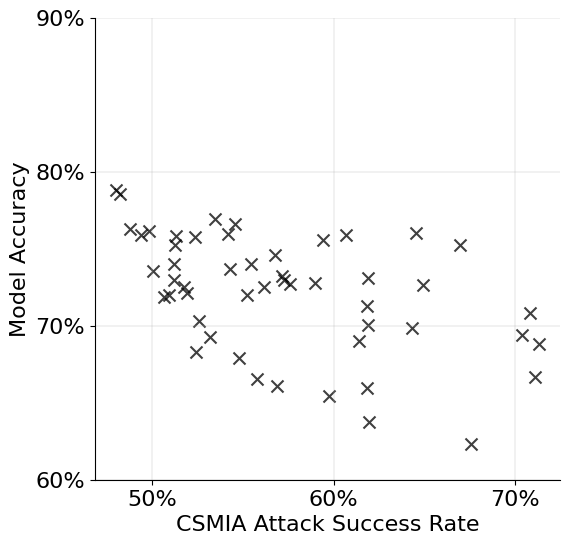

In [59]:
arr = correlation_vs_ang_diff_df[['CSMIA_attack_accuracy', "model_accuracy"]].to_numpy()

x_values = [100 * item[0] for item in arr]
y_values = [100 * item[1] for item in arr]

# Creating the scatter plot
fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(x_values, y_values, color='black', alpha=0.75, marker='x', s=75)
# plt.title('Scatter Plot of Correlation vs Angular Difference')
plt.ylabel('Model Accuracy', fontsize=fontsize)
plt.xlabel(f'CSMIA Attack Success Rate', fontsize=fontsize)
ax.set_xticks(np.arange(50, 80, 10))
ax.set_xticklabels([f'{i:.0f}%' for i in np.arange(50, 80, 10)], fontsize=fontsize)
ax.set_yticks(np.arange(60, 100, 10))
ax.set_yticklabels([f'{i:.0f}%' for i in np.arange(60, 100, 10)], fontsize=fontsize)
# plt.xlim(-0.5, 0.025)
plt.grid(True, linewidth=0.25)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# sns.despine()
plt.show()

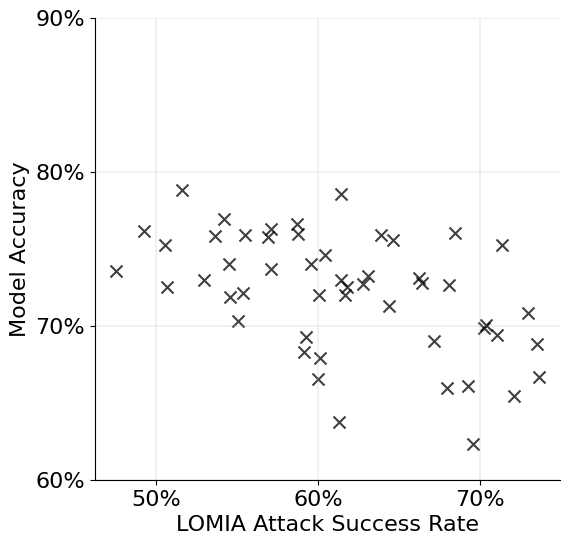

In [72]:
arr = correlation_vs_ang_diff_df[['LOMIA_attack_accuracy', "model_accuracy"]].to_numpy()

x_values = [100 * item[0] for item in arr]
y_values = [100 * item[1] for item in arr]

# Creating the scatter plot
fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(x_values, y_values, color='black', alpha=0.75, marker='x', s=75)
# plt.title('Scatter Plot of Correlation vs Angular Difference')
plt.ylabel('Model Accuracy', fontsize=fontsize)
plt.xlabel(f'LOMIA Attack Success Rate', fontsize=fontsize)
ax.set_xticks(np.arange(50, 80, 10))
ax.set_xticklabels([f'{i:.0f}%' for i in np.arange(50, 80, 10)], fontsize=fontsize)
ax.set_yticks(np.arange(60, 100, 10))
ax.set_yticklabels([f'{i:.0f}%' for i in np.arange(60, 100, 10)], fontsize=fontsize)
# plt.xlim(-0.5, 0.025)
plt.grid(True, linewidth=0.25)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# sns.despine()
plt.show()

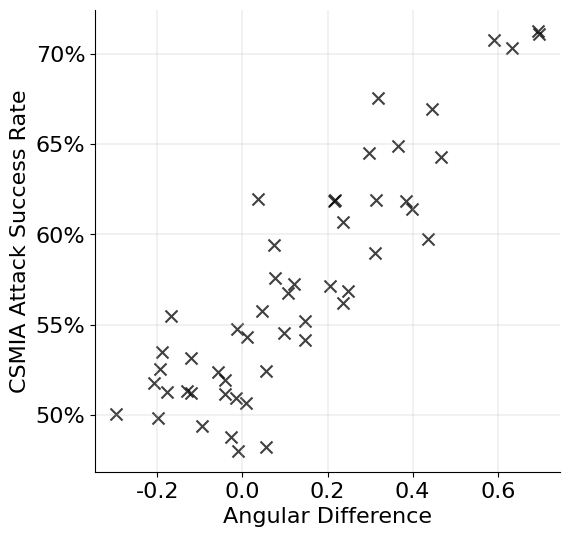

In [70]:
arr = correlation_vs_ang_diff_df[['angular_difference', "CSMIA_attack_accuracy"]].to_numpy()

x_values = [item[0] for item in arr]
y_values = [100 * item[1] for item in arr]

# Creating the scatter plot
fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(x_values, y_values, color='black', alpha=0.75, marker='x', s=75)
# plt.title('Scatter Plot of Correlation vs Angular Difference')
plt.xlabel('Angular Difference', fontsize=fontsize)
plt.ylabel(f'CSMIA Attack Success Rate', fontsize=fontsize)
ax.set_xticks(np.arange(-0.2, 0.7, 0.2))
ax.set_xticklabels([f'{i:.1f}' for i in np.arange(-0.2, 0.7, 0.2)], fontsize=fontsize)
ax.set_yticks(np.arange(50, 75, 5))
ax.set_yticklabels([f'{i:.0f}%' for i in np.arange(50, 75, 5)], fontsize=fontsize)
# plt.xlim(-0.5, 0.025)
plt.grid(True, linewidth=0.25)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# sns.despine()
plt.show()

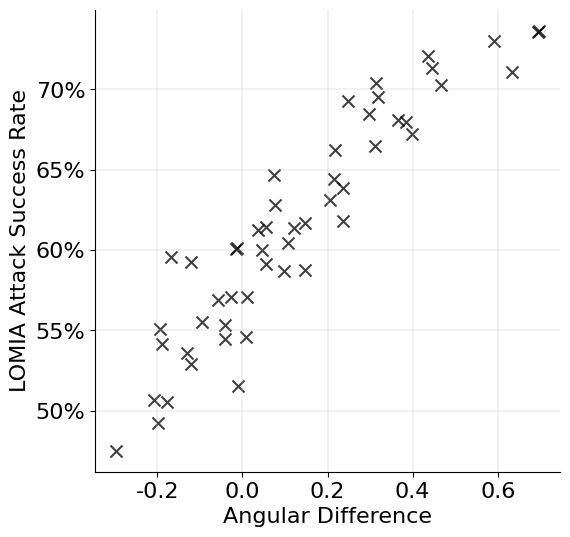

In [71]:
arr = correlation_vs_ang_diff_df[['angular_difference', "LOMIA_attack_accuracy"]].to_numpy()

x_values = [item[0] for item in arr]
y_values = [100 * item[1] for item in arr]

# Creating the scatter plot
fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(x_values, y_values, color='black', alpha=0.75, marker='x', s=75)
# plt.title('Scatter Plot of Correlation vs Angular Difference')
plt.xlabel('Angular Difference', fontsize=fontsize)
plt.ylabel(f'LOMIA Attack Success Rate', fontsize=fontsize)
ax.set_xticks(np.arange(-0.2, 0.7, 0.2))
ax.set_xticklabels([f'{i:.1f}' for i in np.arange(-0.2, 0.7, 0.2)], fontsize=fontsize)
ax.set_yticks(np.arange(50, 75, 5))
ax.set_yticklabels([f'{i:.0f}%' for i in np.arange(50, 75, 5)], fontsize=fontsize)
# plt.xlim(-0.5, 0.025)
plt.grid(True, linewidth=0.25)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# sns.despine()
plt.show()

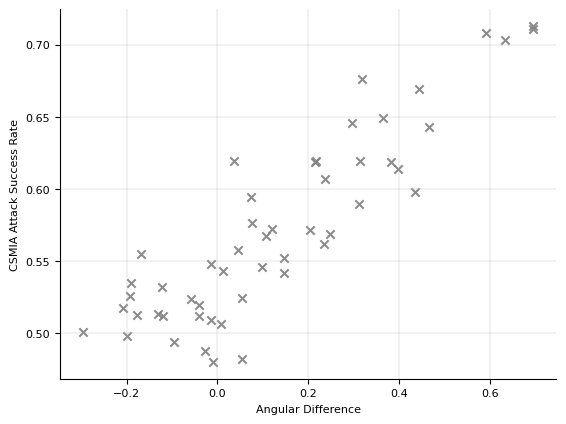

In [20]:
arr = correlation_vs_ang_diff_df[['angular_difference', "CSMIA_attack_accuracy"]].to_numpy()

x_values = [item[0] for item in arr]
y_values = [item[1] for item in arr]

# Creating the scatter plot
fig, ax = plt.subplots()
plt.scatter(x_values, y_values, color='grey', alpha=0.9, marker='x')
# plt.title('Scatter Plot of Correlation vs Angular Difference')
plt.xlabel('Angular Difference')
plt.ylabel(f'CSMIA Attack Success Rate')
# plt.xlim(-0.5, 0.025)
plt.grid(True, linewidth=0.25)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# sns.despine()
plt.show()

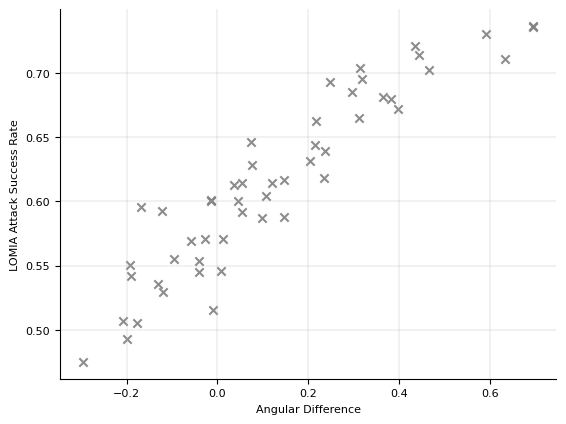

In [21]:
arr = correlation_vs_ang_diff_df[['angular_difference', "LOMIA_attack_accuracy"]].to_numpy()

x_values = [item[0] for item in arr]
y_values = [item[1] for item in arr]

# Creating the scatter plot
fig, ax = plt.subplots()
plt.scatter(x_values, y_values, color='grey', alpha=0.9, marker='x')
# plt.title('Scatter Plot of Correlation vs Angular Difference')
plt.xlabel('Angular Difference')
plt.ylabel(f'LOMIA Attack Success Rate')
# plt.xlim(-0.5, 0.025)
plt.grid(True, linewidth=0.25)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# sns.despine()
plt.show()

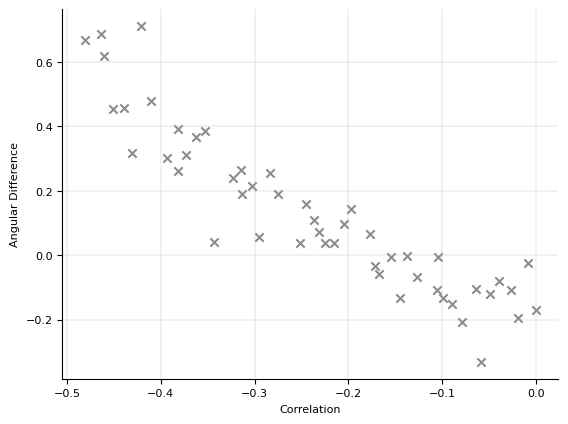

In [345]:
arr = correlation_vs_ang_diff_df[['correlation', "angular_difference"]].to_numpy()

x_values = [item[0] for item in arr]
y_values = [item[1] for item in arr]

# Creating the scatter plot
fig, ax = plt.subplots()
plt.scatter(x_values, y_values, color='grey', alpha=0.9, marker='x')
# plt.title('Scatter Plot of Correlation vs Angular Difference')
plt.xlabel('Correlation')
plt.ylabel(f'Angular Difference')
# plt.xlim(-0.5, 0.025)
plt.grid(True, linewidth=0.25)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# sns.despine()
plt.show()

In [318]:
attacks = ['CSMIA', 'LOMIA']
metrics = [kendalltau, spearmanr]
metric_name_dict = {
    kendalltau: 'Kendall Tau',
    spearmanr: 'Spearman R'
}

ranking_perf_dict = {}
for attack in attacks:
    ranking_perf_dict[attack] = {}
    for metric in metrics:
        ranking_perf_dict[attack][metric_name_dict[metric]] = {}

        for dia in ['angular_difference', 'baseline_attack_accuracy']:
            ranking_perf = metric(correlation_vs_ang_diff_df[[f'{attack}_attack_accuracy']].to_numpy(), correlation_vs_ang_diff_df[[dia]].to_numpy())
            ranking_perf_dict[attack][metric_name_dict[metric]][dia] = f'{round(ranking_perf.statistic, 4)} ({ranking_perf.pvalue:.2e})'
            # x_values = correlation_vs_ang_diff[[f'{attack}_attack_accuracy']].to_numpy()
            # ranking_perf_dict[attack][metric][dia] = metric(x_values, x_values)

In [319]:
ranking_perf_dict

{'CSMIA': {'Kendall Tau': {'angular_difference': '0.6914 (1.39e-12)',
   'baseline_attack_accuracy': '-0.0759 (4.37e-01)'},
  'Spearman R': {'angular_difference': '0.8767 (7.23e-17)',
   'baseline_attack_accuracy': '-0.1225 (3.97e-01)'}},
 'LOMIA': {'Kendall Tau': {'angular_difference': '0.7579 (8.30e-15)',
   'baseline_attack_accuracy': '-0.0931 (3.40e-01)'},
  'Spearman R': {'angular_difference': '0.9104 (5.06e-20)',
   'baseline_attack_accuracy': '-0.1275 (3.77e-01)'}}}

In [315]:
f"{ranking_perf.pvalue:.2e}"

'1.39e-12'

In [309]:
ranking_perf_dict

{'CSMIA': {'<function kendalltau at 0x1277929d0>': {'angular_difference': SignificanceResult(statistic=0.6914285714285714, pvalue=1.3900963709598425e-12),
   'baseline_attack_accuracy': SignificanceResult(statistic=-0.07591836734693877, pvalue=0.43660923632935034)},
  '<function spearmanr at 0x1277928b0>': {'angular_difference': SignificanceResult(statistic=0.8766866746698678, pvalue=7.232312722148806e-17),
   'baseline_attack_accuracy': SignificanceResult(statistic=-0.1224969987995198, pvalue=0.39673069234463554)}},
 'LOMIA': {'<function kendalltau at 0x1277929d0>': {'angular_difference': SignificanceResult(statistic=0.7578604143440391, pvalue=8.3035518660684e-15),
   'baseline_attack_accuracy': SignificanceResult(statistic=-0.0930992319345048, pvalue=0.3402724081290214)},
  '<function spearmanr at 0x1277928b0>': {'angular_difference': SignificanceResult(statistic=0.9103699971410856, pvalue=5.0555002063792164e-20),
   'baseline_attack_accuracy': SignificanceResult(statistic=-0.1275420

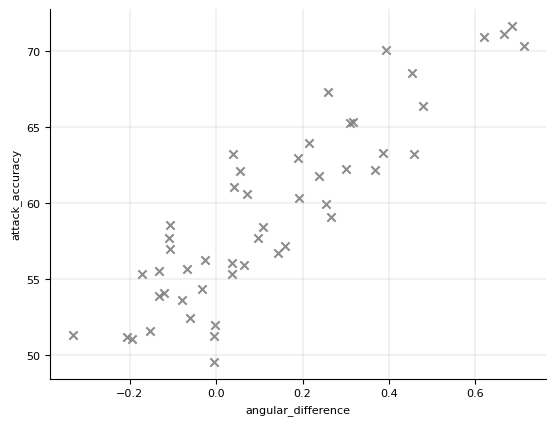

In [273]:
plot_comparison(correlation_vs_ang_diff_df, 'angular_difference', 'attack_accuracy')

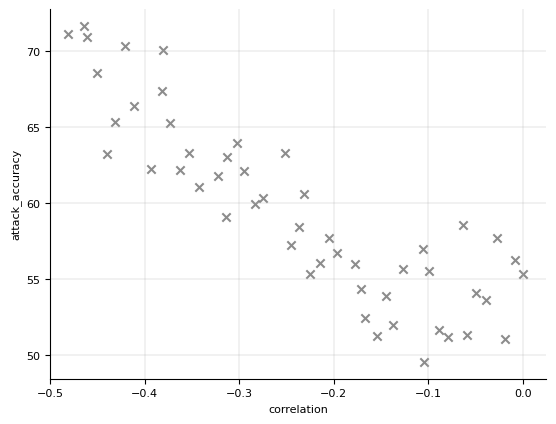

In [241]:
plot_comparison(correlation_vs_ang_diff_df)

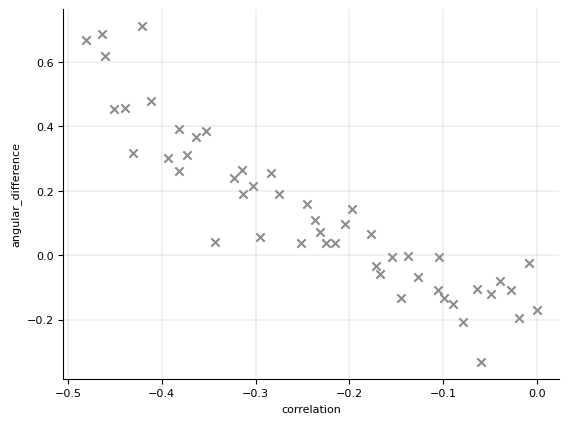

In [246]:
plot_comparison(correlation_vs_ang_diff_df, y_axis_col_name='angular_difference')

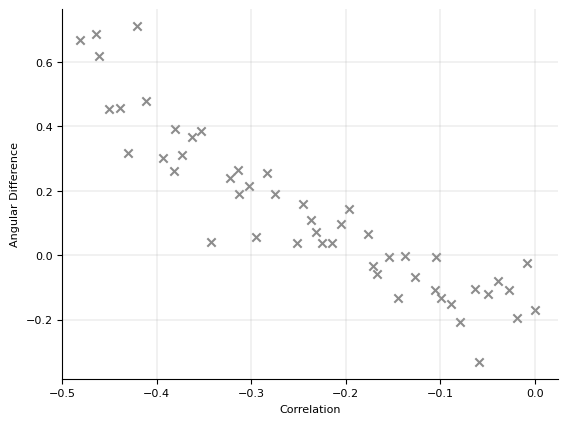

In [167]:
correlation_vs_ang_diff_df = pd.DataFrame.from_dict(correlation_vs_ang_diff, orient='index')
arr = correlation_vs_ang_diff_df[['correlation', 'angular_difference']].to_numpy()

x_values = [item[0] for item in arr]
y_values = [item[1] for item in arr]

# Creating the scatter plot
fig, ax = plt.subplots()
plt.scatter(x_values, y_values, color='grey', alpha=0.9, marker='x')
# plt.title('Scatter Plot of Correlation vs Angular Difference')
plt.xlabel('Correlation')
plt.ylabel('Angular Difference')
plt.xlim(-0.5, 0.025)
plt.grid(True, linewidth=0.25)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# sns.despine()
plt.show()

In [346]:
def draw_conf_scatter_for_state(state_index=0, num_points=300):
    indices = get_indices_by_group_condition(experiment.X_case_2, {'ST': state_index})
    draw_confidence_array_scatter(experiment, experiment.confidence_array_case_2[indices], experiment.y_case_2[indices], num_points)

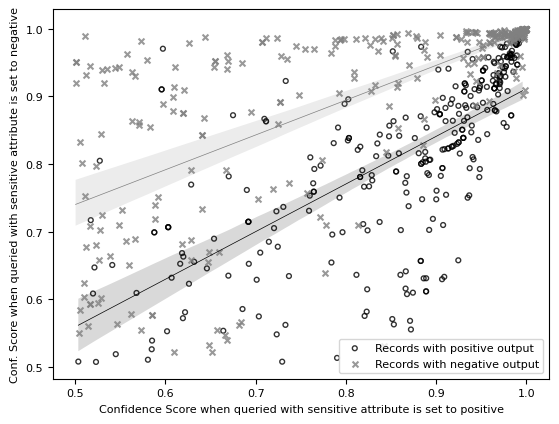

In [352]:
draw_conf_scatter_for_state()

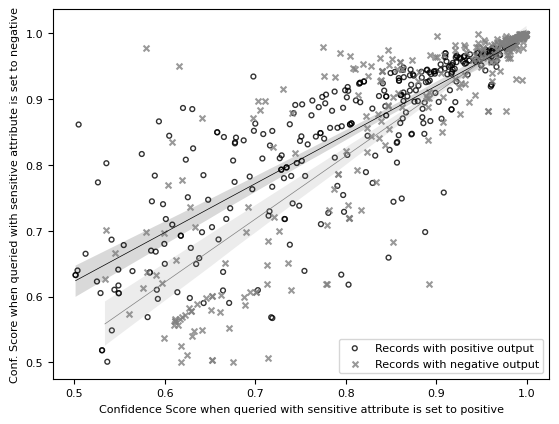

In [353]:
draw_conf_scatter_for_state(state_index=25)

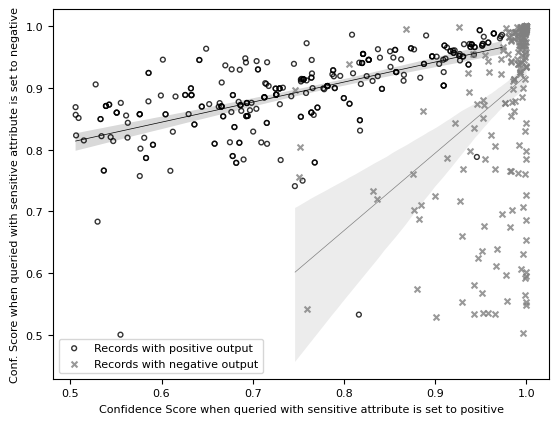

In [354]:
draw_conf_scatter_for_state(state_index=50)